## Harshad Rathod

## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [116]:
import pandas as pd
import re
import glob
import copy
import numpy as np
%matplotlib inline
k = glob.glob("data_raw/*")
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [117]:
def Q1_function():
    
    
    
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    return glob.glob("data_raw/*")


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', 'data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [118]:
def Q2_function(files, s):
    for filename in files:
        if re.search(s,filename):
            return filename
            
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

data_raw\Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [119]:
def Q3_function(files, s):
    

    
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    return pd.read_excel(Q2_function(files,s))

# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
# functions_df.head(3)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [120]:
def Q4_function(dataframe):

    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    
    originalColumns = dataframe.columns
    columnsToKeep = []
    
    for col in dataframe.columns:
        if re.search(r'id',col):
            columnsToKeep.append(col)
    
    for col in dataframe.columns:
        if re.search(r'Time',col) :
            columnsToKeep.append(col)
            
    for col in dataframe.columns:
        if re.search(r'Grade',col) :
            columnsToKeep.append(col)
            
    for col in dataframe.columns:
        if  re.search(r'Q',col):
            columnsToKeep.append(col)
    
    dataframe = dataframe.reindex(columns = columnsToKeep)

    return list(originalColumns),dataframe, dataframe.head(10)
    
# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [121]:
def changeTimeFormate(timeStr):
    timeInt = 0
    matObj = re.search(r'(\d+) ([m][i][n][s])',timeStr)
    if matObj:
        if len(matObj.groups()) > 1:
            timeInt = int(matObj.group(1)) * 60
        
    matObj = re.search(r'(\d+) ([s][e][c][s])',timeStr)
    if matObj:
        if len(matObj.groups()) > 1:
            timeInt = timeInt + int(matObj.group(1)) 

    return timeInt

def Q5_function(df):

    columnDataTypes = df.dtypes
    newCols = []
    
          
    for i in df.columns:
        newCols.append(re.sub(" ","",i))

    df.columns = newCols
 
    if not df['Timetaken'].isnull().any():
        df['Timetaken'].fillna(0)

    df['time'] = df['Timetaken'].apply(changeTimeFormate)
    df.drop(columns = ['Timetaken'],axis = 1)
    df = df.drop(['Timetaken'], axis=1)
   
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    return columnDataTypes, df


# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print("New Update DataFrame")
print(Q5_df)


Column Datatypes
id              int64
Time taken     object
Grade/45.00     int64
Q. 1 /5.00      int64
Q. 2 /10.00     int64
Q. 3 /6.00      int64
Q. 4 /6.00     object
Q. 5 /12.00    object
Q. 6 /6.00     object
dtype: object
New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6        0     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22 

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [139]:
def Q6_function(df):
  
    ### Adding columns 

    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE

    columnNames = df.columns.tolist()
    
    df = df.drop_duplicates()
    print(df)
    df = df.replace('-',np.nan)
    
    for col in columnNames:
        if re.search('Q',col) :
            df[col] = df[col].astype('float64')
            
    
    df = df.fillna(df.mean().astype('float64'))

    # calculating Mean and Appending it to Last row
    value  = df.drop(['id'],axis =1).describe().mean()
    df.loc['mean'] = value
    return df

# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00  Q.5/12.00  \
0    0           32         5          6         6        0       12.0   
1    1           31         5          8         6        -       12.0   
12  12           20         3          4         3        -       10.0   
2    2           30         5          6         6     3.00       10.0   
3    3           26         5          6         6     3.00        6.0   
4    4           25         5          6         6     6.00        2.0   
5    5           24         5          6         6     3.00        4.0   
6    6           23         5          6         0     0.00        6.0   
7    7           23         4          4         6     3.00        6.0   
8    8           22         4          4         6     0.00        8.0   
9    9           22         5          8         6     3.00        0.0   
10  10           21         5         10         6        -        0.0   
11  11           21         4         

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [140]:
def Q7_function(file):

    """
    :type : String
    :rtype: Float
    """
    Q7_filenames = Q1_function()
    Q7_functions_df = Q3_function(Q7_filenames, s = file)
    Q7_names, Q7_df_subset, Q7_top_10 = Q4_function(Q7_functions_df)    
    column_types, Q7_Q5_df = Q5_function(Q7_df_subset)    
    Q7_Q6_df = Q6_function(Q7_Q5_df)    
    
    for col in Q7_Q6_df:
        if re.search('Grade',col):
            totalGradCol = col
            break
    Q7_Q6_df.drop(Q7_Q6_df.tail(1).index, inplace = True)
    
    mean_ = round(Q7_Q6_df[totalGradCol].mean(),2)
    std_ = round(Q7_Q6_df[totalGradCol].std(),2)
    q1 = round(Q7_Q6_df[totalGradCol].quantile(0.25),2)
    q2 = round(Q7_Q6_df[totalGradCol].quantile(0.5),2)
    q3 = round(Q7_Q6_df[totalGradCol].quantile(0.75),2)
    max_ = round(Q7_Q6_df[totalGradCol].max(),2)
    min_ = round(Q7_Q6_df[totalGradCol].min(),2)

    return mean_,std_,q1,q2,q3,max_,min_ 
    
# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

    id  Grade/21.00  Q.1/7.00 Q.2/4.00  Q.3/6.00  Q.4/4.00  time
0    9        18.50         6     4.00       4.5      4.00   549
1    5        17.50         5     4.00       4.5      4.00   450
2    6        17.17         6     4.00       4.5      2.67   480
3   17        17.00         6     1.00       6.0      4.00   394
4   15        16.50         5     3.00       4.5      4.00   350
5    7        16.00         6     3.00       3.0      4.00   600
6   12        15.17         5     3.00       4.5      2.67   382
7    1        14.83         5     4.00       4.5      1.33   532
8    8        14.50         6     3.00       1.5      4.00   417
9    4        14.33         7     3.00       3.0      1.33   244
10  10        13.83         5     3.00       4.5      1.33   600
11  13        13.50         6     2.00       1.5      4.00   600
12   0        13.33         6     3.00       3.0      1.33   468
13   3        13.00         6        -       3.0      4.00   281
14  18        11.33      

### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

    id  Grade/21.00  Q.1/7.00 Q.2/4.00  Q.3/6.00  Q.4/4.00  time
0    9        18.50         6     4.00       4.5      4.00   549
1    5        17.50         5     4.00       4.5      4.00   450
2    6        17.17         6     4.00       4.5      2.67   480
3   17        17.00         6     1.00       6.0      4.00   394
4   15        16.50         5     3.00       4.5      4.00   350
5    7        16.00         6     3.00       3.0      4.00   600
6   12        15.17         5     3.00       4.5      2.67   382
7    1        14.83         5     4.00       4.5      1.33   532
8    8        14.50         6     3.00       1.5      4.00   417
9    4        14.33         7     3.00       3.0      1.33   244
10  10        13.83         5     3.00       4.5      1.33   600
11  13        13.50         6     2.00       1.5      4.00   600
12   0        13.33         6     3.00       3.0      1.33   468
13   3        13.00         6        -       3.0      4.00   281
14  18        11.33      

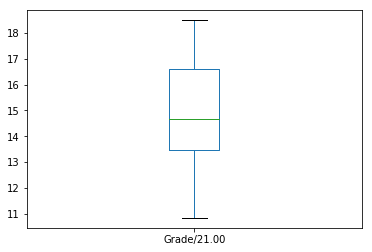

In [141]:
def Q8_function(file):
    

    
    
    """
    :type : String
    :rtype: Plot
    """
    mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file)    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')

    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [142]:
def Q9_function(file):
     
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    
    df = Q3_function(filenames, file)
    
    rows, cols = df.shape
    
    return rows,cols


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [143]:
def Q10_function(df):
    
  
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE
    
    for col in df.columns:
        if re.search('Q.5',col):
            colQ5 = col
            break
    df[colQ5] = df[colQ5].replace('-',np.nan).replace(np.nan,0)
    df[colQ5] = df[colQ5].astype('float64')
    df[colQ5].fillna(0)
    groups  = df.groupby(colQ5).groups
    ids = df.loc[groups[0].values,'id']

    
    return list(groups[0].values),int(df[colQ5].max())

# Call the function and print the results
zero, maximum = Q10_function(Q6_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 12


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [144]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    Q11_filenames = Q1_function()
    df1 = Q3_function(filenames, s = "Tuples")
    df2 = Q3_function(filenames, s = "Taxonomy")
    
    names, df_subset1, top_10 = Q4_function(df1)   
    names, df_subset2, top_10 = Q4_function(df2)   
    
    column_types, Q5_df1 = Q5_function(df_subset1)
    column_types, Q5_df2 = Q5_function(df_subset2)
    
    newDataFrame = pd.merge(Q5_df1,Q5_df2,how = 'outer', on = 'id')
            

    colGrades = []
    for col in newDataFrame.columns:
        if re.search('Grade',col):
            colGrades.append(col)
    
    newDataFrame['Total_score'] = newDataFrame[colGrades[0]].values + newDataFrame[colGrades[1]].values
    max_scorer = newDataFrame.loc[newDataFrame['Total_score'].idxmax(),'id']

    return newDataFrame,max_scorer


# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [145]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    timeTaken = []
    for colName in Q11_df.columns:
        if re.search('time',colName):
            timeTaken.append(colName)
    
    return  sorted( list(df[( df[timeTaken[0]]  + df[timeTaken[1]]  < 1200 )]['id']))



# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [146]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    bins  = pd.cut(df['Grade/45.00'], bins = 5 )
    bins = pd.DataFrame(bins)
    bins.columns =['Bins']
    df1= pd.concat([df, bins], axis = 1)
    df1 = df1.head(-1)
    binSeries = []
    indexSeries = []
    for key,value in df1.groupby('Bins').groups.items():
        value = [int(i) for i in value]
        indexSeries.append(list(value))
        binSeries.append(str(key))

        
    return pd.DataFrame({'Bin':binSeries,'count':indexSeries})['count']




# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

0           [15, 16, 17, 18]
1               [12, 13, 14]
2    [5, 6, 7, 8, 9, 10, 11]
3                     [3, 4]
4                  [0, 1, 2]
Name: count, dtype: object


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [148]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_Q01_function(self):
        ans = ['data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', 'data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']
        result = Q1_function()
        self.assertEqual(ans,result)
        
    def test_Q02_function(self):
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        result = Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])
        
    def test_Q03_function(self):
        result  = ['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00','Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00','Q. 6 /6.00', 'id']
        self.assertEqual(result,list(Q3_function(filenames, s = "Functions")))
        pass
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
    def test_Q05_function(self):        
        column_types, Q5_df = Q5_function(df_subset)
        Expected_colNames = ['id','Timetaken','Grade/45.00','Q.1/5.00','Q.2/10.00','Q.3/6.00','Q.4/6.00','Q.5/12.00','Q.6/6.00','time']
        
        self.assertEqual(Expected_colNames,list(column_types.index))
        
        
    def test_Q07_function(self):
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)
        
    def test_Q07_function(self):
        ansExpected = ['id', 'Grade/45.00','Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 'Q.4/6.00', 'Q.5/12.00','Q.6/6.00','time']
        self.assertEqual(ansExpected,list(Q6_df.columns))
        
    def test_Q08_function(self):
        # it is plot
        pass
    
    def test_Q09_function(self):
        row, columns = Q9_function (file='Strings')
        self.assertEqual(row,17)
        self.assertEqual(columns,7)
        
    def test_Q10_function(self):
        zero, maximum = Q10_function(Q6_df)

        self.assertEqual(zero,list([9, 10, 13, 17, 18]))
        self.assertEqual(maximum,12)
        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q11_functions(self):
        Q11_df,max_scorer = Q11_function()
        
        self.assertEqual(max_scorer,10)
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]

        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))
            

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q08_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_functions (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.074s

OK
